# SVM-Digits
本 notebook 是使用支持向量机对 Digits 数据集进行图片分类。

代码主要参考自 裔隽，张怿檬，张目清等．Python机器学习实战[M]．北京：科学技术文献出版社，2018

设置环境如下

python 的版本为 3.7.0

scikit-learn 库的版本为 0.20.0

matplotlib 库的版本为 3.0.0

## 1 Digits 数据集简介
Digits 数据集主要由 8*8 大小的阿拉伯数字图片构成，数据集包含 1797 个样本，分为 0~9 十种不同的数字。

## 2 分类
在分类过程中首先读取数据集，并将其随机分割成 80% 的训练集和 20% 的测试集，然后在训练集上采用高斯核函数的 SVM 分类器，并在验证集上测试准确率，最后输出混淆矩阵和分类报告。

In [4]:
# 载入需要的库
from sklearn.svm import SVC
from sklearn.datasets import load_digits
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import random

In [5]:
# 载入样本数据集
digits=load_digits()

In [6]:
# 获取数据集图片及对应的标签
images=digits.images
labels=digits.target

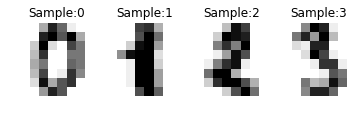

In [7]:
# 绘制样本图片
for index,(image,label) in enumerate(zip(images[:4],labels[:4])):
    plt.subplot(1,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Sample:%i'% label)
plt.show()

In [8]:
# 转换图片为向量
n_samples=len(images)
image_vectors=images.reshape((n_samples,-1))

In [9]:
# 分割训练集与测试集
sample_index=list(range(n_samples))
test_size=int(n_samples*0.2)
random.shuffle(sample_index)
train_index,test_index=sample_index[test_size:],sample_index[:test_size]
X_train,Y_train=image_vectors[train_index],labels[train_index]
X_test,Y_test=image_vectors[test_index],labels[test_index]

In [10]:
# 构建 SVC 分类器训练并预报，使用 rbf 核函数
classifier=SVC(kernel='rbf',C=1.0,gamma=0.001)
classifier.fit(X_train,Y_train)
prediction=classifier.predict(X_test)

In [12]:
# 输出结果及混淆矩阵
print("Classification report for classifier %s: \n%s \n" %(classifier,metrics.classification_report(Y_test,prediction)))
print("Confusion matrix: \n%s"%metrics.confusion_matrix(Y_test,prediction))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        30
           6       0.97      0.97      0.97        34
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        35
           9       1.00      0.98      0.99        46

   micro avg       0.99      0.99      0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99